# Digit Recognizer

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

train_data = pd.read_csv('../../data/digit_recognizer/train.csv')
test_data = pd.read_csv('../../data/digit_recognizer/test.csv')

### Exploring Data

In [2]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def visualize_image(i):
  image = np.array(
    train_data.drop('label', axis=1).iloc[i]
  ).reshape((28,28))
  label = train_data.iloc[i]['label']

  plt.imshow(image, cmap='gray')
  plt.title(label)
  plt.axis('off')


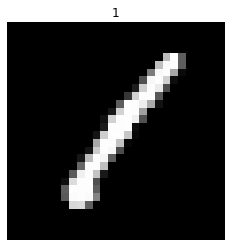

In [6]:
visualize_image(0)

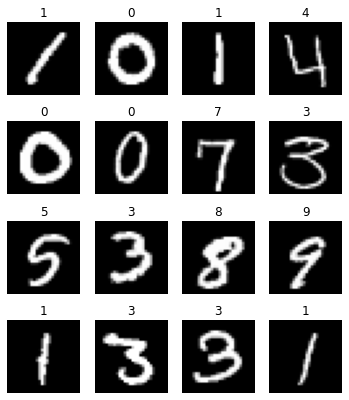

In [7]:
plt.figure(figsize=(6,7))

for i in range(16):
  plt.subplot(4, 4, i+1)
  visualize_image(i)

<AxesSubplot:xlabel='label', ylabel='count'>

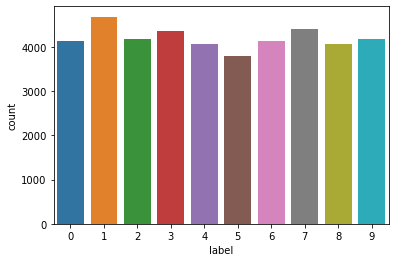

In [8]:
# checking that data is balanced
sns.countplot(x='label', data=train_data)

In [9]:
from sklearn.model_selection import train_test_split

X = train_data.drop('label', axis=1)/255.0
y = train_data['label']

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.15)

### Logistic Regression

Attains an accuracy of 92%

In [10]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression(max_iter=1000)
lrmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

pred = lrmodel.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[612   0   1   1   0   4   7   0   5   1]
 [  0 639   0   2   0   4   0   1   6   0]
 [  2   9 570  10   5   0   9  12  15   3]
 [  3   2  11 601   0  25   2   6  13   4]
 [  0   5   2   2 570   0   5   1   2  24]
 [ 12   4   6  20   6 513   6   4  15   2]
 [  3   3   4   1   5  12 586   0   6   2]
 [  3   1   7   5   4   0   0 623   2  18]
 [  4  11   8  24   3  17   4   5 523   7]
 [  3   2   0   9  16   3   0  21   6 565]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       631
           1       0.95      0.98      0.96       652
           2       0.94      0.90      0.92       635
           3       0.89      0.90      0.90       667
           4       0.94      0.93      0.93       611
           5       0.89      0.87      0.88       588
           6       0.95      0.94      0.94       622
           7       0.93      0.94      0.93       663
           8       0.88      0.86      0.87       606
           9       0.90     

### K Nearest Neighbors

Attains an accuracy of 94%

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [13]:


pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[623   0   0   1   0   0   4   0   0   3]
 [  0 649   0   1   0   0   1   0   1   0]
 [  6  29 565   4   5   1   1  21   3   0]
 [  2  11   2 621   0  10   3   7   8   3]
 [  0  17   0   0 552   0   7   1   0  34]
 [  4   9   0   9   2 537  14   1   0  12]
 [  5   5   0   0   0   7 604   1   0   0]
 [  1  20   1   0   1   1   0 632   0   7]
 [  3  22   2  17   1  10   9   3 520  19]
 [  2   5   0   7   8   1   0   8   2 592]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       631
           1       0.85      1.00      0.91       652
           2       0.99      0.89      0.94       635
           3       0.94      0.93      0.94       667
           4       0.97      0.90      0.94       611
           5       0.95      0.91      0.93       588
           6       0.94      0.97      0.95       622
           7       0.94      0.95      0.95       663
           8       0.97      0.86      0.91       606
           9       0.88     

### Deep Neural Network

Attains accuracy of 97.49%

In [14]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


dnn = Sequential([
  Flatten(),
  Dense(units=512, activation='relu'),
  Dense(units=128, activation='relu'),
  Dense(10, activation='softmax')
])

dnn.compile(
  loss = SparseCategoricalCrossentropy(),
  optimizer=Adam(),
  metrics=['accuracy']
)

history = dnn.fit(X_train,
                  y_train,
                  epochs=10,
                  validation_data=(X_test, y_test))

Epoch 1/10
1116/1116 [==============================] - 6s 5ms/step - loss: 0.2308 - accuracy: 0.9295 - val_loss: 0.1306 - val_accuracy: 0.9590
Epoch 2/10
1116/1116 [==============================] - 6s 5ms/step - loss: 0.0960 - accuracy: 0.9699 - val_loss: 0.1078 - val_accuracy: 0.9652
Epoch 3/10
1116/1116 [==============================] - 5s 4ms/step - loss: 0.0628 - accuracy: 0.9797 - val_loss: 0.1009 - val_accuracy: 0.9676
Epoch 4/10
1116/1116 [==============================] - 6s 5ms/step - loss: 0.0432 - accuracy: 0.9857 - val_loss: 0.1090 - val_accuracy: 0.9694
Epoch 5/10
1116/1116 [==============================] - 5s 5ms/step - loss: 0.0374 - accuracy: 0.9876 - val_loss: 0.1022 - val_accuracy: 0.9710
Epoch 6/10
1116/1116 [==============================] - 5s 5ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0991 - val_accuracy: 0.9740
Epoch 7/10
1116/1116 [==============================] - 5s 4ms/step - loss: 0.0294 - accuracy: 0.9902 - val_loss: 0.0810 - val_accuracy:

Text(0.5, 0, 'epoch')

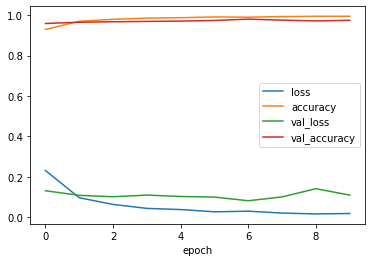

In [15]:
pd.DataFrame(history.history).plot()
plt.xlabel('epoch')

### Convolutional Neural Network

Attains accuracy of 98.95%

In [16]:
X_train = np.array(X_train).reshape(-1, 28, 28, 1)
X_test = np.array(X_test).reshape(-1, 28, 28, 1)

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

cnn = Sequential([
  Conv2D(filters=64,
         kernel_size=(3,3),
         input_shape=(28,28,1),
         activation='relu'),
  MaxPool2D(2,2),
  Conv2D(filters=64,
         kernel_size=(3,3),
         input_shape=(28,28,1),
         activation='relu'),
  MaxPool2D(2,2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

cnn.compile(
  loss=SparseCategoricalCrossentropy(),
  optimizer=Adam(),
  metrics=['accuracy']
)

In [18]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [19]:
history = cnn.fit(X_train,
                  y_train,
                  epochs=10,
                  validation_data=(X_test,y_test))

Epoch 1/10
1116/1116 [==============================] - 31s 27ms/step - loss: 0.1654 - accuracy: 0.9488 - val_loss: 0.0661 - val_accuracy: 0.9798
Epoch 2/10
1116/1116 [==============================] - 29s 26ms/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.0489 - val_accuracy: 0.9854
Epoch 3/10
1116/1116 [==============================] - 28s 26ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0536 - val_accuracy: 0.9827
Epoch 4/10
1116/1116 [==============================] - 30s 27ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0407 - val_accuracy: 0.9870
Epoch 5/10
1116/1116 [==============================] - 28s 25ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.0363 - val_accuracy: 0.9894
Epoch 6/10
1116/1116 [==============================] - 32s 29ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0459 - val_accuracy: 0.9875
Epoch 7/10
1116/1116 [==============================] - 32s 28ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.0494 -

Text(0.5, 0, 'epoch')

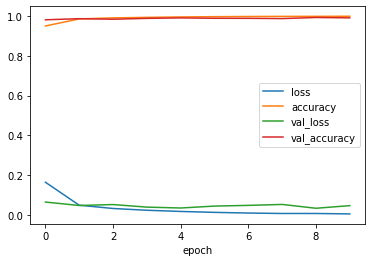

In [20]:
pd.DataFrame(history.history).plot()
plt.xlabel('epoch')

### Submission

In [21]:
test_data = np.array(test_data).reshape(-1, 28, 28, 1)
pred = np.argmax(cnn.predict(test_data), axis=-1)

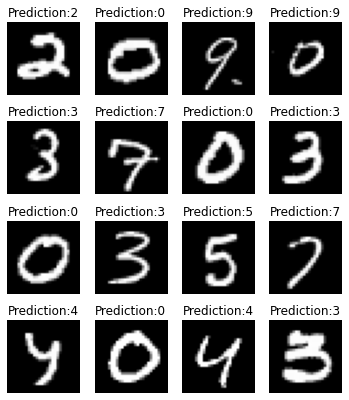

In [22]:
plt.figure(figsize=(6,7))

for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(test_data[i].reshape(28,28), cmap='gray')
  plt.title('Prediction:' + str(pred[i]))
  plt.axis('off')


In [23]:
submission = pd.DataFrame({
  'ImageId':pd.Series(list(range(1, len(pred)+1))),
  'Label':pd.Series(pred)})
submission.to_csv("submission.csv", index=False)